##### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [18]:
#load the houseprice data with categorical columns 
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [19]:
df.shape

(1460, 4)

In [20]:
#finding the how many nul;l values are there in our data set 
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [21]:
#null values sorting 
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequenced categorical names  with every feature

<AxesSubplot:>

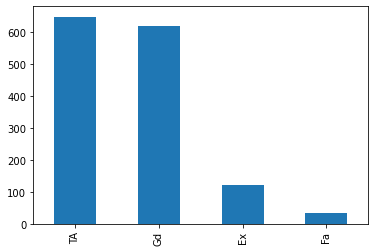

In [8]:
#howing in the bar plot of feature in categorical events
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

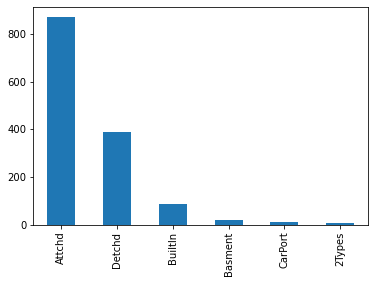

In [11]:
#howing in the bar plot of feature in categorical events
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

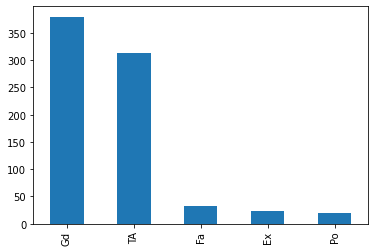

In [12]:
#howing in the bar plot of feature in categorical events
df['FireplaceQu'].value_counts().plot.bar()

In [13]:
#howing in the bar plot of feature in categorical events
df['GarageType'].value_counts().index[0]

'Attchd'

In [22]:
#creating the function for imputation nan values with mode for categorical features 
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [24]:
#creating for loop for implementation of all features in few lines code 
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [25]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

##### Adding a variable to capture NAN

In [26]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

<IPython.core.display.Javascript object>

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [28]:
#we have to replace the missing values where null values consideriong the 1 other than 0
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [29]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [36]:
frequent=df['BsmtQual'].mode()[0]

In [37]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [38]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [39]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [40]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var  FireplaceQu_Var
0       Gd          Gd     Attchd     208500             0                1
1       Gd          TA     Attchd     181500             0                0
2       Gd          TA     Attchd     223500             0                0
3       TA          Gd     Detchd     140000             0                0
4       Gd          TA     Attchd     250000             0                0

#### Suppose if you have more frequent categories, we just replace NAN with a new category with nan replaced by ,missing 

In [55]:
#load the data with use categorical columns 
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

<IPython.core.display.Javascript object>

In [56]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [57]:
#create the function for imputing nan replaced by missing 
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [59]:
#implementing the new features for all requred features 
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [60]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice BsmtQualnewvar FireplaceQunewvar  \
0       Gd         NaN     Attchd     208500             Gd           Missing   
1       Gd          TA     Attchd     181500             Gd                TA   
2       Gd          TA     Attchd     223500             Gd                TA   
3       TA          Gd     Detchd     140000             TA                Gd   
4       Gd          TA     Attchd     250000             Gd                TA   

  GarageTypenewvar  
0           Attchd  
1           Attchd  
2           Attchd  
3           Detchd  
4           Attchd

In [61]:
#drop the original null categorical columns
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [62]:
df.head()

SalePrice BsmtQualnewvar FireplaceQunewvar GarageTypenewvar
0     208500             Gd           Missing           Attchd
1     181500             Gd                TA           Attchd
2     223500             Gd                TA           Attchd
3     140000             TA                Gd           Detchd
4     250000             Gd                TA           Attchd